In [1]:
# 2. Load and inspect data
import kagglehub
import os #opratine system for locations 
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

file_path = os.path.join(path, 'fashion-mnist_test.csv')
df = pd.read_csv(file_path)
# or we can load data kerass.dataset 

In [2]:
#Data Exploration & Preprocessing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Before flattening:", X_train.shape)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print("After flattening:", X_train.shape)



C:\Users\USER PC\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Before flattening: (60000, 28, 28)
After flattening: (60000, 784)


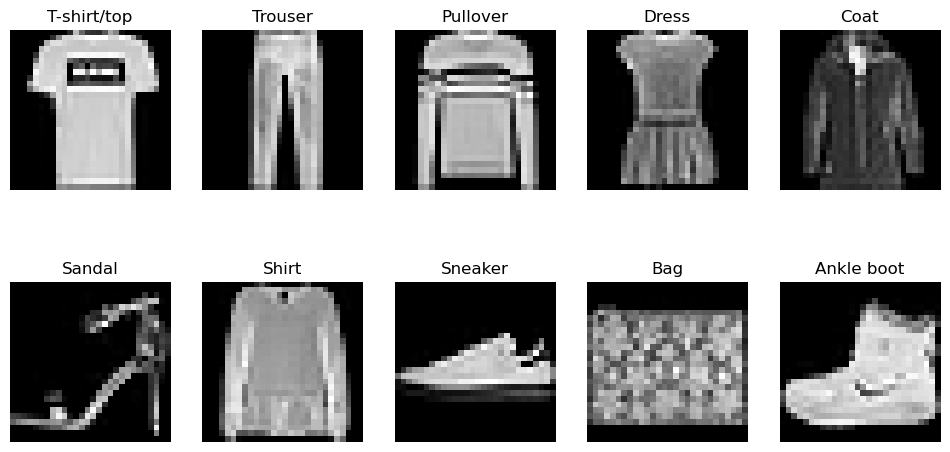

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(12, 6))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx].reshape(28, 28), cmap="gray")
    plt.title(class_names[i])
    plt.axis("off")
plt.show()


In [4]:
#Shallow Baseline Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_shallow = Sequential([
    Dense(32, activation='sigmoid', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model_shallow.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_shallow = model_shallow.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.1,
    verbose=2
)

test_loss, test_acc = model_shallow.evaluate(X_test, y_test)
print("Shallow Model Test Accuracy:", test_acc)


C:\Users\USER PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 - 11s - 6ms/step - accuracy: 0.5938 - loss: 1.4895 - val_accuracy: 0.6993 - val_loss: 1.0836
Epoch 2/10
1688/1688 - 9s - 5ms/step - accuracy: 0.7175 - loss: 0.9468 - val_accuracy: 0.7450 - val_loss: 0.8298
Epoch 3/10
1688/1688 - 7s - 4ms/step - accuracy: 0.7485 - loss: 0.7808 - val_accuracy: 0.7635 - val_loss: 0.7216
Epoch 4/10
1688/1688 - 8s - 5ms/step - accuracy: 0.7686 - loss: 0.6965 - val_accuracy: 0.7730 - val_loss: 0.6577
Epoch 5/10
1688/1688 - 8s - 5ms/step - accuracy: 0.7841 - loss: 0.6424 - val_accuracy: 0.7905 - val_loss: 0.6135
Epoch 6/10
1688/1688 - 8s - 5ms/step - accuracy: 0.7971 - loss: 0.6033 - val_accuracy: 0.8007 - val_loss: 0.5844
Epoch 7/10
1688/1688 - 8s - 5ms/step - accuracy: 0.8069 - loss: 0.5735 - val_accuracy: 0.8088 - val_loss: 0.5576
Epoch 8/10
1688/1688 - 8s - 5ms/step - accuracy: 0.8136 - loss: 0.5496 - val_accuracy: 0.8138 - val_loss: 0.5371
Epoch 9/10
1688/1688 - 8s - 5ms/step - accuracy: 0.8196 - loss: 0.5305 - val_accuracy: 0.8153 -

In [5]:
#Deep & Wide Model
model_deep = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_deep.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_deep = model_deep.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.1,
    verbose=2
)

test_loss, test_acc = model_deep.evaluate(X_test, y_test)
print("Deep Model Test Accuracy:", test_acc)


Epoch 1/20
1688/1688 - 31s - 18ms/step - accuracy: 0.8251 - loss: 0.4848 - val_accuracy: 0.8372 - val_loss: 0.4226
Epoch 2/20
1688/1688 - 36s - 22ms/step - accuracy: 0.8657 - loss: 0.3675 - val_accuracy: 0.8688 - val_loss: 0.3568
Epoch 3/20
1688/1688 - 41s - 24ms/step - accuracy: 0.8779 - loss: 0.3289 - val_accuracy: 0.8727 - val_loss: 0.3417
Epoch 4/20
1688/1688 - 41s - 24ms/step - accuracy: 0.8868 - loss: 0.3039 - val_accuracy: 0.8817 - val_loss: 0.3154
Epoch 5/20
1688/1688 - 41s - 24ms/step - accuracy: 0.8920 - loss: 0.2867 - val_accuracy: 0.8775 - val_loss: 0.3458
Epoch 6/20
1688/1688 - 27s - 16ms/step - accuracy: 0.8972 - loss: 0.2714 - val_accuracy: 0.8797 - val_loss: 0.3437
Epoch 7/20
1688/1688 - 26s - 16ms/step - accuracy: 0.9023 - loss: 0.2601 - val_accuracy: 0.8782 - val_loss: 0.3462
Epoch 8/20
1688/1688 - 26s - 16ms/step - accuracy: 0.9050 - loss: 0.2507 - val_accuracy: 0.8868 - val_loss: 0.3159
Epoch 9/20
1688/1688 - 37s - 22ms/step - accuracy: 0.9095 - loss: 0.2372 - val_a

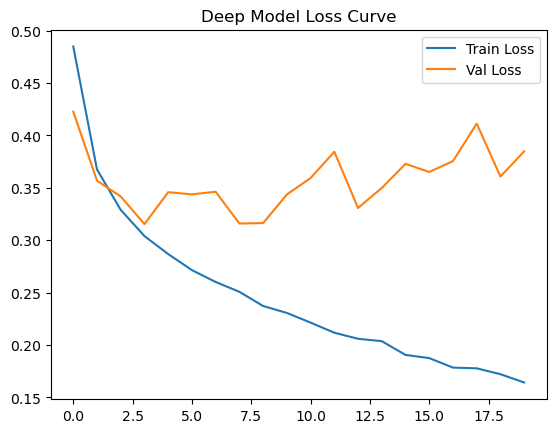

In [6]:
#Fighting Overfitting
plt.plot(history_deep.history['loss'], label='Train Loss')
plt.plot(history_deep.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Deep Model Loss Curve")
plt.show()


In [16]:
#Add Dropout + Early Stopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_reg = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_reg.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history_reg = model_reg.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=2
)


C:\Users\USER PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1688/1688 - 26s - 16ms/step - accuracy: 0.7905 - loss: 0.5824 - val_accuracy: 0.8420 - val_loss: 0.4381
Epoch 2/30
1688/1688 - 40s - 24ms/step - accuracy: 0.8444 - loss: 0.4342 - val_accuracy: 0.8633 - val_loss: 0.3840
Epoch 3/30
1688/1688 - 42s - 25ms/step - accuracy: 0.8566 - loss: 0.4002 - val_accuracy: 0.8663 - val_loss: 0.3532
Epoch 4/30
1688/1688 - 41s - 24ms/step - accuracy: 0.8634 - loss: 0.3766 - val_accuracy: 0.8743 - val_loss: 0.3440
Epoch 5/30
1688/1688 - 40s - 24ms/step - accuracy: 0.8709 - loss: 0.3592 - val_accuracy: 0.8817 - val_loss: 0.3333
Epoch 6/30
1688/1688 - 42s - 25ms/step - accuracy: 0.8745 - loss: 0.3450 - val_accuracy: 0.8800 - val_loss: 0.3407
Epoch 7/30
1688/1688 - 39s - 23ms/step - accuracy: 0.8784 - loss: 0.3354 - val_accuracy: 0.8778 - val_loss: 0.3402
Epoch 8/30
1688/1688 - 43s - 26ms/step - accuracy: 0.8835 - loss: 0.3237 - val_accuracy: 0.8805 - val_loss: 0.3256
Epoch 9/30
1688/1688 - 41s - 24ms/step - accuracy: 0.8852 - loss: 0.3200 - val_a

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


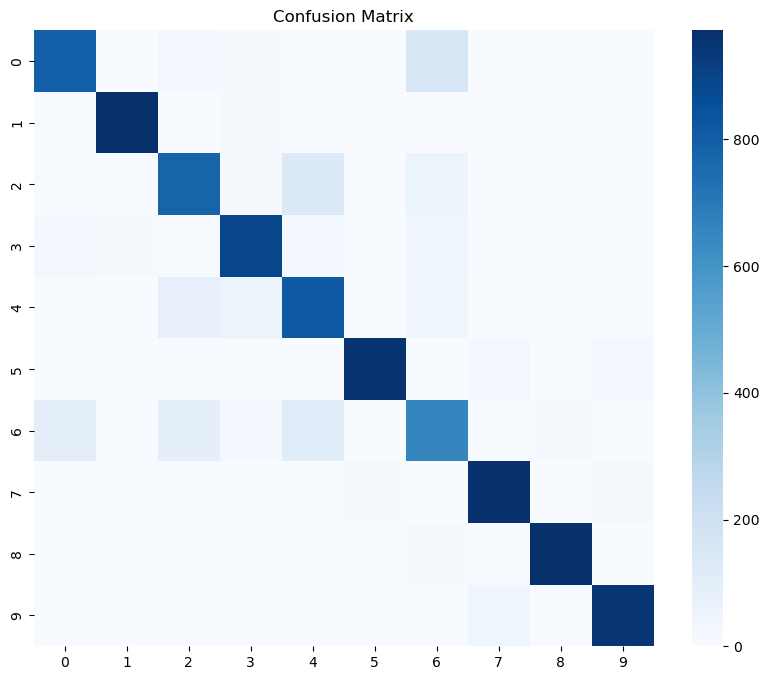

In [8]:
#Forensic Analysis
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model_reg.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


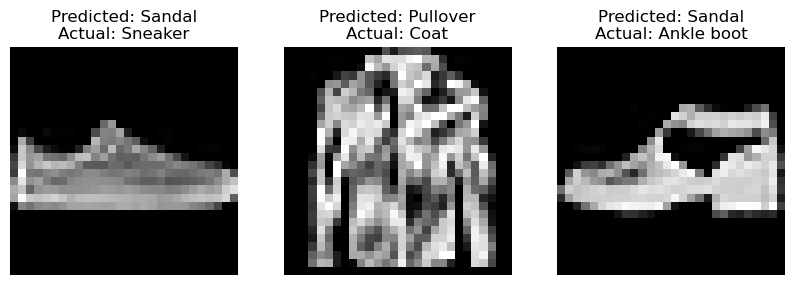

In [9]:
wrong_idx = np.where(y_pred != y_test)[0][:3]

plt.figure(figsize=(10, 4))
for i, idx in enumerate(wrong_idx):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[y_pred[idx]]}\nActual: {class_names[y_test[idx]]}")
    plt.axis("off")
plt.show()


In [10]:
#Train with Batch Size = 32
history_32 = model_reg.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)


Epoch 1/10
1688/1688 - 29s - 17ms/step - accuracy: 0.8839 - loss: 0.3196 - val_accuracy: 0.8857 - val_loss: 0.3222
Epoch 2/10
1688/1688 - 29s - 17ms/step - accuracy: 0.8859 - loss: 0.3135 - val_accuracy: 0.8795 - val_loss: 0.3390
Epoch 3/10
1688/1688 - 34683s - 21s/step - accuracy: 0.8875 - loss: 0.3119 - val_accuracy: 0.8887 - val_loss: 0.3207
Epoch 4/10
1688/1688 - 23s - 13ms/step - accuracy: 0.8894 - loss: 0.3053 - val_accuracy: 0.8880 - val_loss: 0.3219
Epoch 5/10
1688/1688 - 39s - 23ms/step - accuracy: 0.8901 - loss: 0.3034 - val_accuracy: 0.8735 - val_loss: 0.3415
Epoch 6/10
1688/1688 - 22s - 13ms/step - accuracy: 0.8917 - loss: 0.2982 - val_accuracy: 0.8847 - val_loss: 0.3372
Epoch 7/10
1688/1688 - 42s - 25ms/step - accuracy: 0.8926 - loss: 0.2990 - val_accuracy: 0.8863 - val_loss: 0.3303
Epoch 8/10
1688/1688 - 42s - 25ms/step - accuracy: 0.8939 - loss: 0.2910 - val_accuracy: 0.8907 - val_loss: 0.3281
Epoch 9/10
1688/1688 - 23s - 14ms/step - accuracy: 0.8947 - loss: 0.2925 - val

In [15]:
#Train with Batch Size = 1024
history_1024 = model_reg.fit(
    X_train, y_train,
    epochs=10,
    batch_size=1024,
    validation_split=0.1,
    verbose=2
)


Epoch 1/10
53/53 - 4s - 75ms/step - accuracy: 0.9185 - loss: 0.2190 - val_accuracy: 0.8992 - val_loss: 0.3076
Epoch 2/10
53/53 - 5s - 96ms/step - accuracy: 0.9186 - loss: 0.2171 - val_accuracy: 0.8993 - val_loss: 0.3115
Epoch 3/10
53/53 - 5s - 100ms/step - accuracy: 0.9190 - loss: 0.2182 - val_accuracy: 0.9005 - val_loss: 0.3083
Epoch 4/10
53/53 - 5s - 95ms/step - accuracy: 0.9190 - loss: 0.2158 - val_accuracy: 0.8993 - val_loss: 0.3093
Epoch 5/10
53/53 - 5s - 88ms/step - accuracy: 0.9192 - loss: 0.2140 - val_accuracy: 0.8997 - val_loss: 0.3092
Epoch 6/10
53/53 - 6s - 108ms/step - accuracy: 0.9197 - loss: 0.2179 - val_accuracy: 0.8980 - val_loss: 0.3118
Epoch 7/10
53/53 - 5s - 89ms/step - accuracy: 0.9194 - loss: 0.2123 - val_accuracy: 0.8995 - val_loss: 0.3118
Epoch 8/10
53/53 - 6s - 106ms/step - accuracy: 0.9210 - loss: 0.2121 - val_accuracy: 0.8990 - val_loss: 0.3098
Epoch 9/10
53/53 - 5s - 90ms/step - accuracy: 0.9214 - loss: 0.2117 - val_accuracy: 0.8983 - val_loss: 0.3099
Epoch 1